In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from google.colab import files
import plotly.express  as pxfrom
from sklearn.metrics import confusion_matrix
uploaded =files.upload()

Saving loan_approval.csv to loan_approval.csv


In [ ]:
df= pd.read_csv('loan_approval.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


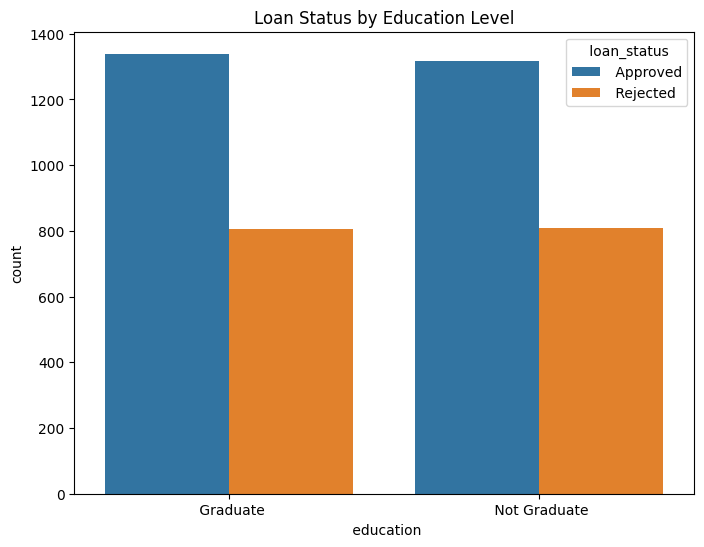

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=' education', hue=' loan_status',data=df)
plt.title('Loan Status by Education Level')
plt.show()

<ipython-input-5-fed76928edc8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


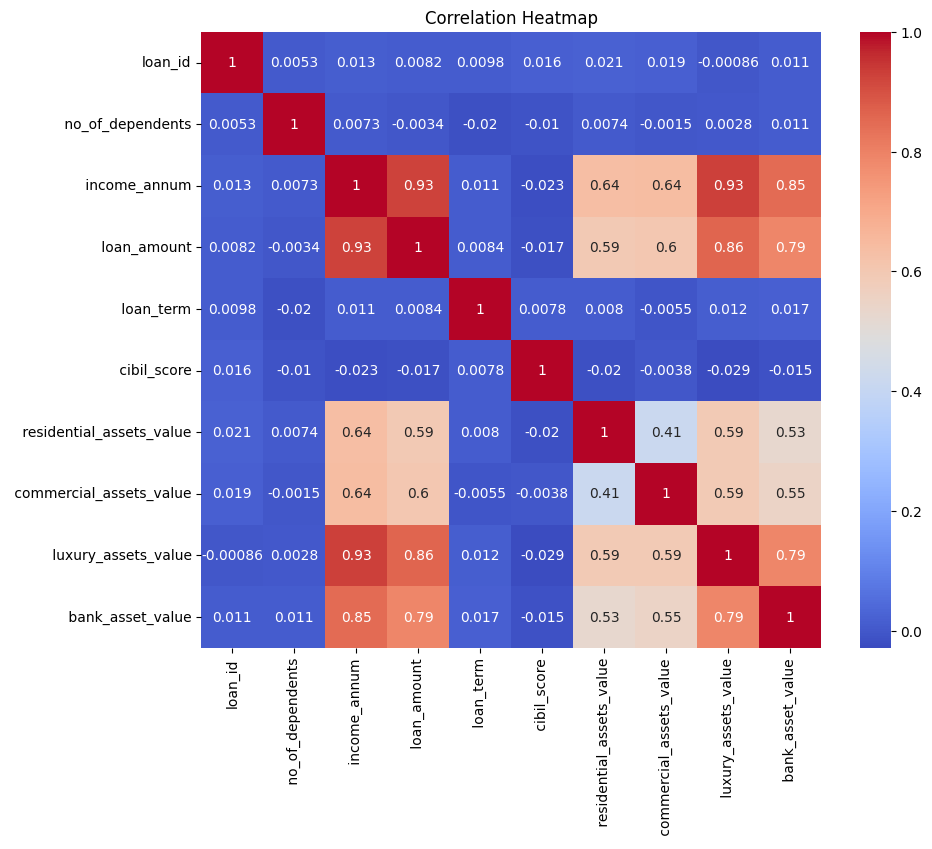

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 800x600 with 0 Axes>

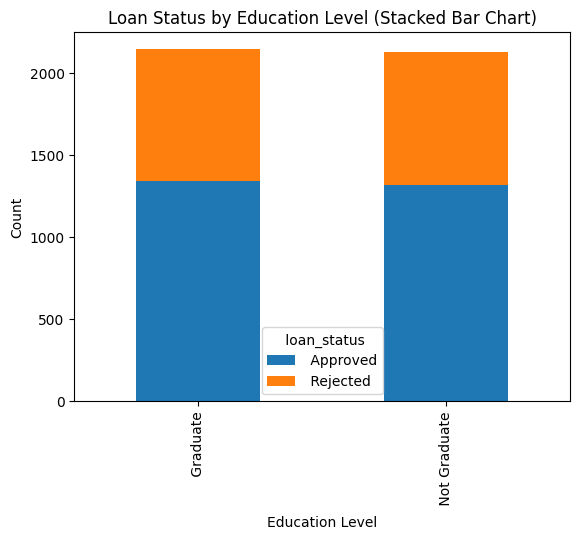

In [ ]:
plt.figure(figsize=(8, 6))
education_counts = df.groupby([' education', ' loan_status']).size().unstack(' loan_status')
education_counts.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Loan Status by Education Level (Stacked Bar Chart)')
plt.show()

In [ ]:
df=df.drop(['loan_id',' no_of_dependents', ' education',' commercial_assets_value',' luxury_assets_value',' bank_asset_value'],axis=1)
df

,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,loan_status
0,No,9600000,29900000,12,778,2400000,Approved
1,Yes,4100000,12200000,8,417,2700000,Rejected
2,No,9100000,29700000,20,506,7100000,Rejected
3,No,8200000,30700000,8,467,18200000,Rejected
4,Yes,9800000,24200000,20,382,12400000,Rejected
...,...,...,...,...,...,...,...
4264,Yes,1000000,2300000,12,317,2800000,Rejected
4265,Yes,3300000,11300000,20,559,4200000,Approved
4266,No,6500000,23900000,18,457,1200000,Rejected
4267,No,4100000,12800000,8,780,8200000,Approved


In [ ]:
df[' loan_status'] = df[' loan_status'].apply(lambda x: 1 if x==' Approved' else 0)
df[' self_employed']=df[' self_employed'].apply(lambda x: 1 if x==' Yes' else 0)
df


,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,loan_status
0,0,9600000,29900000,12,778,2400000,1
1,1,4100000,12200000,8,417,2700000,0
2,0,9100000,29700000,20,506,7100000,0
3,0,8200000,30700000,8,467,18200000,0
4,1,9800000,24200000,20,382,12400000,0
...,...,...,...,...,...,...,...
4264,1,1000000,2300000,12,317,2800000,0
4265,1,3300000,11300000,20,559,4200000,1
4266,0,6500000,23900000,18,457,1200000,0
4267,0,4100000,12800000,8,780,8200000,1


In [ ]:
import numpy as np
df[' income_annum']= df[' income_annum']/ (max(df[' income_annum'].values))
df[' loan_amount']= df[' loan_amount']/ (max(df[' loan_amount'].values))
df[' loan_term']= df[' loan_term']/ (max(df[' loan_term'].values))
df[' residential_assets_value']= df[' residential_assets_value']/ (max(df[' residential_assets_value'].values))
df[' cibil_score']= df[' cibil_score']/ (max(df[' cibil_score'].values))
df

,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,loan_status
0,0,0.969697,0.756962,0.6,0.864444,0.082474,1
1,1,0.414141,0.308861,0.4,0.463333,0.092784,0
2,0,0.919192,0.751899,1.0,0.562222,0.243986,0
3,0,0.828283,0.777215,0.4,0.518889,0.625430,0
4,1,0.989899,0.612658,1.0,0.424444,0.426117,0
...,...,...,...,...,...,...,...
4264,1,0.101010,0.058228,0.6,0.352222,0.096220,0
4265,1,0.333333,0.286076,1.0,0.621111,0.144330,1
4266,0,0.656566,0.605063,0.9,0.507778,0.041237,0
4267,0,0.414141,0.324051,0.4,0.866667,0.281787,1


In [ ]:
X = df.drop(' loan_status',axis=1)
y = df[' loan_status']
X,y

(       self_employed   income_annum   loan_amount   loan_term   cibil_score  \
 0                  0       0.969697      0.756962         0.6      0.864444   
 1                  1       0.414141      0.308861         0.4      0.463333   
 2                  0       0.919192      0.751899         1.0      0.562222   
 3                  0       0.828283      0.777215         0.4      0.518889   
 4                  1       0.989899      0.612658         1.0      0.424444   
 ...              ...            ...           ...         ...           ...   
 4264               1       0.101010      0.058228         0.6      0.352222   
 4265               1       0.333333      0.286076         1.0      0.621111   
 4266               0       0.656566      0.605063         0.9      0.507778   
 4267               0       0.414141      0.324051         0.4      0.866667   
 4268               0       0.929293      0.751899         0.5      0.674444   
 
        residential_assets_value  
 0 

In [ ]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name:  loan_status, Length: 4269, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=3)


In [ ]:
X_test.shape

(854, 6)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

In [ ]:
accuracy= accuracy_score(predictions,y_test)
accuracy = accuracy*100
accuracy


92.03747072599532

In [ ]:
print(classification_report(predictions,y_test,target_names=['Rejected','Approved']))

              precision    recall  f1-score   support

    Rejected       0.88      0.91      0.89       316
    Approved       0.95      0.93      0.94       538

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



In [ ]:
answer= model.predict(([[0,0.414141,0.324051,0.4,0.866667,0.281787]]))
answer

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
if answer == 0 :
  print("Rejected")
else:
  print("ACCEPTED")

ACCEPTED


In [ ]:
confusion = confusion_matrix(predictions,y_test)
print (confusion)


[[288  28]
 [ 40 498]]


[Text(0, 0.5, 'Rejected'), Text(0, 1.5, 'Approved')]

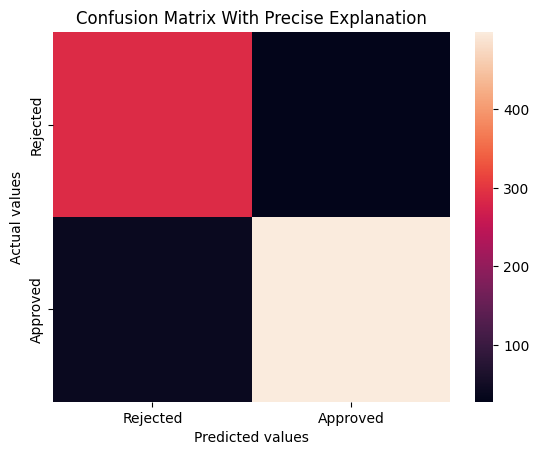

In [ ]:
fig = sns.heatmap(confusion)
fig.set_title('Confusion Matrix With Precise Explanation')
fig.set_xlabel('Predicted values')
fig.set_ylabel('Actual values')
fig.xaxis.set_ticklabels(['Rejected','Approved'])
fig.yaxis.set_ticklabels(['Rejected','Approved'])
